In [37]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
fig_path = '../figures/'

In [2]:
'''
To do list:
# 1. What distances are most popular between men and women
# 2. How many races occur over time
3. Where do the most racers come from
4. Most prominent age categories when compared to distance/length
5. How many races go over 1 day.
6. Who are the fastest athletes for the top 10 or so distances
7. When do the most races occur
8. What athletes participate in the most races.
'''

'\nTo do list:\n# 1. What distances are most popular between men and women\n2. How many races occur over time\n3. Where do the most racers come from\n4. Most prominent age categories when compared to distance/length\n5. How many races go over 1 day.\n6. Who are the fastest athletes for the top 10 or so distances\n7. When do the most races occur\n8. What athletes participate in the most races.\n'

In [3]:
df = pd.read_csv('../data/ultra_marathons_data_cleaned.csv')
try:
    df.drop('Unnamed: 0', axis=1, inplace=True)
except:
    pass
df.head()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8672\3470472946.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ultra_marathons_data_cleaned.csv')


,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
0,2018,Selva Costera (CHI),50.00,22,0.00,Tnfrc,CHI,1978,M,M35,10.286,0,km,2018-01-06,2018-01-06,4:51:39
1,2018,Selva Costera (CHI),50.00,22,0.00,Roberto Echeverría,CHI,1981,M,M35,9.501,1,km,2018-01-06,2018-01-06,5:15:45
2,2018,Selva Costera (CHI),50.00,22,0.00,Puro Trail Osorno,CHI,1987,M,M23,9.472,2,km,2018-01-06,2018-01-06,5:16:44
3,2018,Selva Costera (CHI),50.00,22,0.00,Columbia,ARG,1976,M,M40,8.976,3,km,2018-01-06,2018-01-06,5:34:13
4,2018,Selva Costera (CHI),50.00,22,0.00,Baguales Trail,CHI,1992,M,M23,8.469,4,km,2018-01-06,2018-01-06,5:54:14


In [4]:
df.isnull().sum()

year_of_event            0
event_name               0
distance_or_length    1436
no_of_finishers          0
total_distance           2
athlete_club            42
athlete_country          3
birth_year               0
gender                   7
age_category             0
average_speed          224
athlete_id               0
race_metric           1436
start_date               0
end_date                19
fastest_time           189
dtype: int64

In [5]:
df['race_metric'].value_counts()

race_metric
km       6156513
mi        776590
hours     514466
days       12190
Name: count, dtype: int64

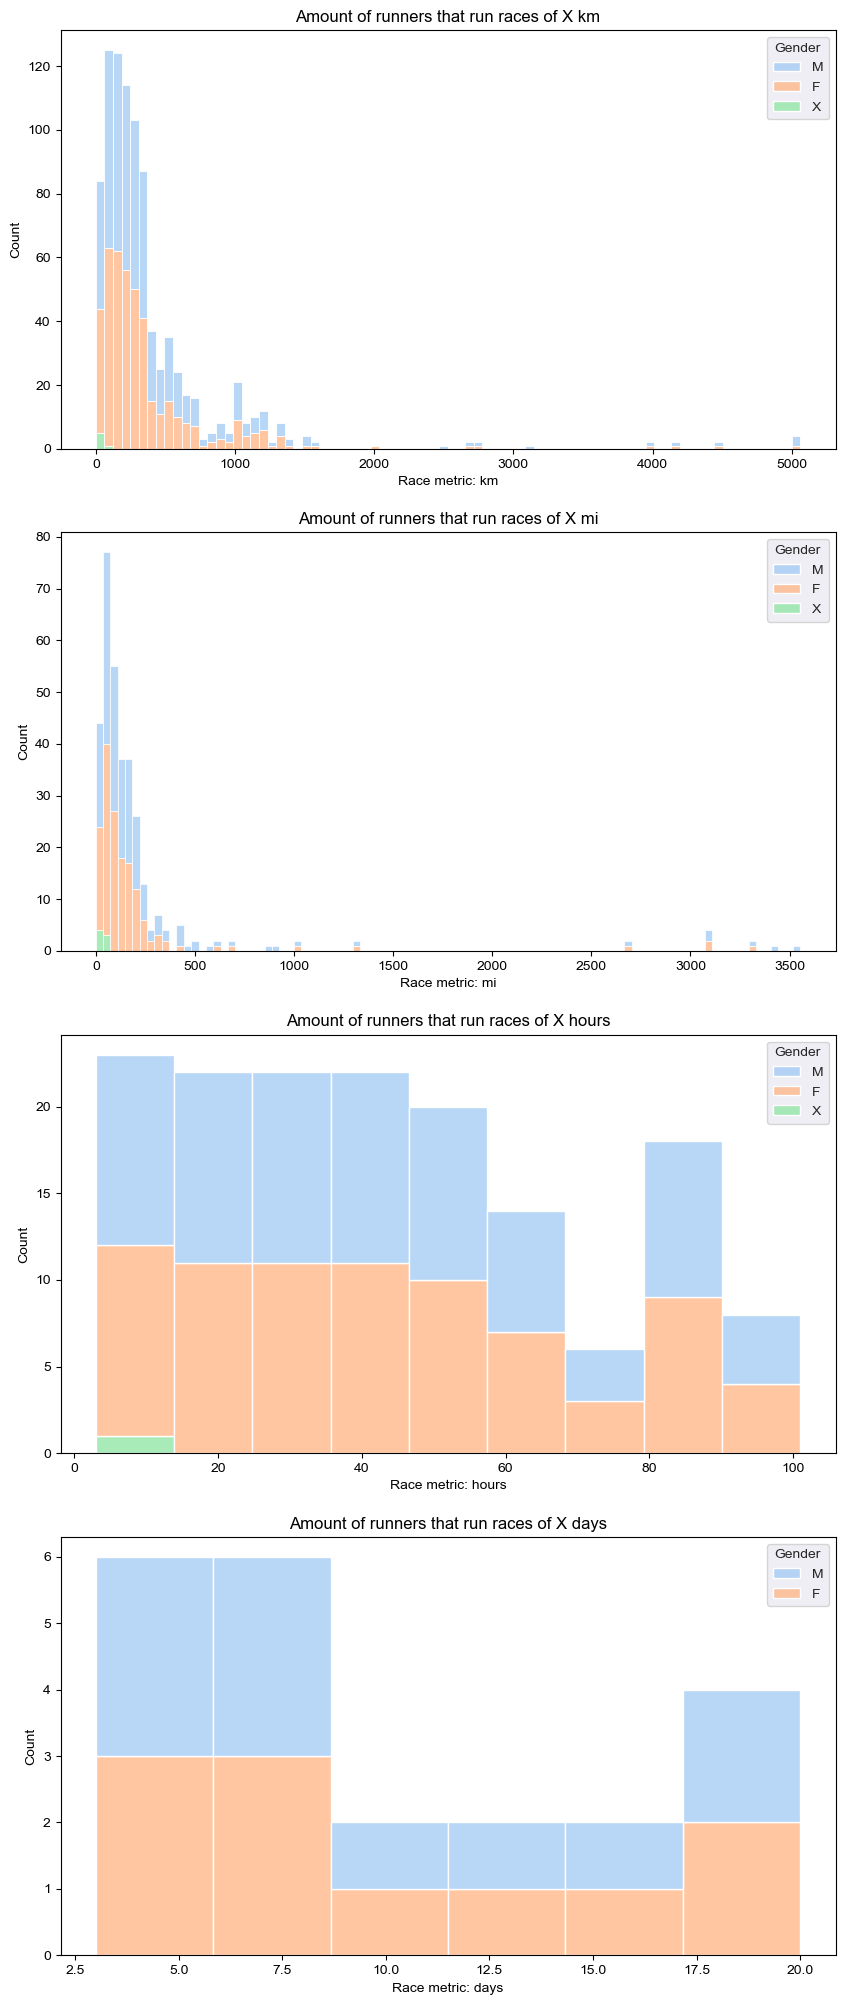

In [6]:
fig, ax = plt.subplots(4, 1, figsize=(10, 25))
sns.set_palette('pastel')
sns.set_style('darkgrid')
for metric, i in [
    ('km', 0),
    ('mi', 1),
    ('hours', 2),
    ('days', 3)
]:
    temp_df = df[['gender', 'distance_or_length', 'race_metric']
                 ][df['race_metric'] == metric].value_counts().reset_index()
    temp_df.columns = ['Gender', 'Distance', 'Metric', 'Count']

    sns.histplot(data=temp_df, x='Distance',
                 hue='Gender', multiple='stack', ax=ax[i])
    ax[i].set_title(f'Amount of runners that run races of X {metric}')
    ax[i].set_xlabel(f'Race metric: {metric}')
    
fig.savefig(f'{fig_path}count_of_runners_by_distance.jpg')

In [7]:
df['start_date'].value_counts().reset_index().sort_values(by = 'start_date', ascending = True)

,start_date,count
6938,1798-08-01,1
6703,1801-11-01,3
6950,1801-11-10,1
6951,1801-12-02,1
6949,1802-07-01,1
...,...,...
4622,2022-12-26,50
6020,2022-12-27,13
2470,2022-12-28,385
3822,2022-12-29,100


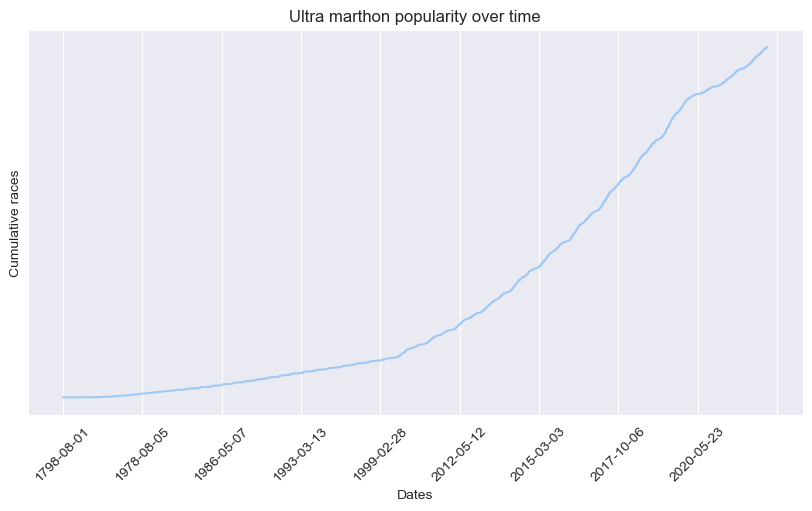

In [19]:
# Ultra marathon race popularity over time
fig, ax = plt.subplots(figsize = (10, 5))
dates_df = df['start_date'].value_counts().reset_index().sort_values(by = 'start_date', ascending = True)
dates_df['cumsum'] = dates_df['count'].cumsum()
sns.lineplot(data = dates_df, x = 'start_date', y = 'cumsum', ax = ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_title('Ultra marthon popularity over time')
ax.set_xlabel('Dates')
ax.set_ylabel('Cumulative races')
ax.set_yticks([])
plt.xticks(rotation = 45)
fig.savefig(f'{fig_path}ultras_popularity_over_time.jpg')

In [38]:
country_counts = df['athlete_country'].value_counts().reset_index()
country_counts = ['country_code', 'count']
# Assuming you have a DataFrame `country_coords` with 'country_code', 'lat', and 'lon'
country_counts = country_counts.merge(country_coords, on='country_code')


fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [48]:
df['athlete_id'].value_counts().reset_index().sort_values(by = 'count', ascending = False).head(10)

,athlete_id,count
0,4033,1783
1,236,873
2,3977,640
3,39253,541
4,10408,539
5,24312,505
6,43644,485
7,76721,482
8,30526,479
9,1046462,477


<Axes: xlabel='distance_or_length', ylabel='age_category'>

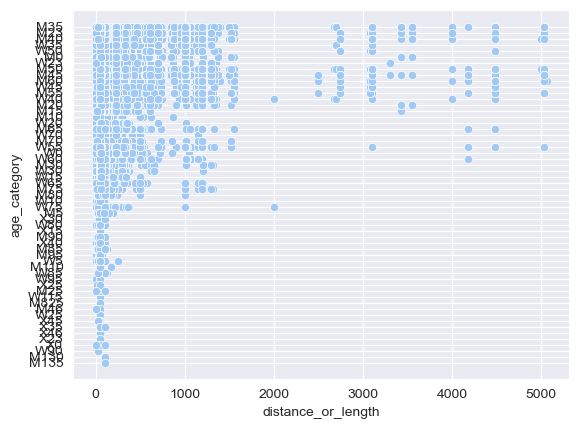

In [53]:
sns.scatterplot(data = df, x = 'distance_or_length', hue = 'age_category')